# Métodos numéricos para equações diferenciais ordinárias e aplicações em dinâmica atmosférica

---

**Como entregar:** Enviar o seu jupyter notebook (.ipynb) pelo próprio Classroom. Uma cópia deste notebook será automaticamente criada para você no seu Google Drive e mantida atualizada com suas modificações, você pode usar essa cópia mesmo, sem necessidade de criar outra. Se optar por fazer fora do Colab, lembre-se de fazer upload do seu notebook.


**Leia com atenção:**


*   Os exercícios que valem nota estão todos marcados uma exclamação❗.
*   Atividades marcadas com 🧩 são opcionais.
*   Use o Google Colab para executar o notebook e fazer a tarefa, ou baixe no seu computador e faça na API que preferir, mas lembre-se de entregar no Classroom a versão final.
*   Há questões dissertativas e questões computacionais! Responda com códigos e texto, nos campos indicados.
*   Entregue o notebook completo, com todo conteúdo original e mais os seus códigos e textos.
*   ❗Exercício 00:❗ Para mostrar que você leu até aqui, escreva seu nome completo (assinatura) na linha a seguir:




*Assinatura:*



---



## Preliminares

Se você já está familiarizado com Python, siga em frente! Se não, faça a atividade opcional do curso, resolvendo esse tutorial:

https://drive.google.com/file/d/13MbsX8Se5FNdgl0zl4PXRcDpTxig5jkC/view?usp=sharing

In [1]:
import numpy as np                  #Numpy
import matplotlib.pyplot as plt     # Gráficos/figuras
import matplotlib.colors
from prettytable import PrettyTable #Tabelas mais bonitinhas

Referências:
*   https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.01-ODE-Initial-Value-Problem-Statement.html



---



## Introdução e Motivação

Muitos problemas aplicados com dinâmica temporal (sistemas dinâmicos) podem ser modelados por um problema de valor inicial baseado em equações diferenciais ordinárias.

Problemas de fluidos, como na dinâmica atmosférica e oceânica, são modelados com equações diferenciais parciais, pois envolvem tempo e espaço. Porém, ao discretizarmos a parte de derivadas espaciais, obtemos um sistema de equações diferenciais ordinárias a ser resolvido!

Nosso objetivo nesta aula é analisar essa parte temporal, assumindo que toda a parte espacial já foi tratada de alguma forma (a ser discutida).

Vamos discutir acurácia, estabilidade e caracteristicas dos métodos numéricos usados para essa dinâmica temporal.

## Interpretando ondas em equações ordinárias

### 📚 Passo a passo da simplificação de um modelo completo

1. **O problema contínuo**:
Vamos supor que temos uma equação diferencial parcial (EDP), por exemplo da dinâmica atmosférica/oceânica, ou de um fluido qualquer. Vamos expressar essa EDP como
$$
\frac{\partial u(t, \vec{x})}{\partial t}=\mathcal{F}(u(t,\vec{x}))
$$
onde $F$ tem todas as derivadas espaciais (em $\vec{x}$).

2. **O problema discreto no espaço:**
 Discretizando o domínio espacial ($N$ pontos $\vec{x}_i$), por exemplo em uma malha qualquer na reta/plano/esfera), e aplicando o método numérico para aproximar as derivadas espaciais, podemos escrever o problema como
$$
\frac{d U(t)}{d t}=F(U(t)),
$$
onde $U(t)$ é o vetor de tamanho $N$ com incógnitas para a variável de interesse nos pontos de malha, e $F$ o operador que aproxima $\mathcal{F}$ no caso discreto.

3. **O problema linear:**
Para simplificar a análise a seguir, vamos supor que a equação seja linear ($F$ linear em $U$), ou pensar em uma linearização do problema não-linea (usando expansão em Série de Taylor, por exemplo). Com essa simplificação, o sistema se reduz a
$$
\frac{d U(t)}{d t}=AU(t),
$$
onde $A$ é uma matriz $N\times N$. Esse problema poderia modelar, por exemplo, apenas ondas de gravidade ou som, sem interações não lineares entre elas.

4. **Os modos normais:**
A matriz $A$ pode ser decomposta em seus autovetores, de tal forma que podemos representar $A$ como
$$ A=QDQ^{-1}$$
onde $Q$ é a matriz dos autovetores de $A$, e $D$ a matriz diagonal dos autovalores (que podem assumir valores reais ou imaginários!)

5. **O problema simplificado:**
Agora podemos tomar uma mudança de variáveis,
$$V(t)=Q^{-1}U(t), \quad \text{ }\,\,\, U(t)=QV(t).$$ Substitutindo a decomposição da matriz $A$ no nosso sistema dinâmico discreto, junto com a mudança de variáveis, temos
$$
\frac{d U(t)}{d t}=AU(t),
$$

$$
\frac{d QV(t)}{d t}=QDQ^{-1} QV(t),
$$

$$
Q\frac{d V(t)}{d t}=QDV(t).
$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Multiplicando os dois lados da equação por $Q^{-1}$, temos que

$$
\frac{d V(t)}{d t}=DV(t).
$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Agora, como $D$ é diagonal, esse novo sistema é totalmente desacoplado! Isto é, apesar de termos $N$ variáveis, o sistema para cada incógnita independe das demais! Logo, podemos representar esse problema como um problema em 1 dimensão:
$$
\frac{d v(t)}{d t}=\lambda v(t),
$$
onde $\lambda$ é um autovalor de $A$ (possivelmente complexo).

**Alerta:** Alguns passos acima exigem certas hipóteses mais rigorosas que não estamos comentando! O importante é capturar a ideia central do motivo desse modelo simplificado já representar algo relevante. Dos detalhes, cuidaremos mais adiante...



---









> **In a nutshell:**
Se soubermos os modos normais do nosso problema complicado, isto é, conhecermos os autovalores da parte linear (ou de uma linearização) do problema (frequencia de ondas de gravidade, Rossby, por exemplo), podemos investigar de forma equivalente um problema muito mais simples (problema escalar, 1D, com variação somente no tempo!):
$$
\frac{d v(t)}{d t}=\lambda v(t).
$$
Esse problema já deve representar bem a dinâmica linear do problema! E podemos usá-lo como problema modelo inicial.








---




### 📚 O problema modelo



O problema
$$
\frac{d v(t)}{d t}=\lambda v(t),
$$

sendo conhecida uma condição inicial $v(0)=v_0$ e com $\lambda$ complexo, é conhecido como problema modelo, e tem solução bem conhecida:
$$
v(t)=v_0e^{\lambda t}.
$$

(Verifique tomando a derivada no tempo de $v$)

Como $\lambda$ pode ser complexo ($\lambda =\alpha+\beta i$), as soluções são da forma:

$$
v(t)=v_0e^{\alpha t+\beta i t},
$$
$$
v(t)=v_0e^{\alpha t}e^{\beta i t},
$$
$$
v(t)=v_0e^{\alpha t}\left(\cos(\beta t)+i\sin(\beta t)\right).
$$

Logo, temos duas componentes:
1.  Difusiva/anti-difusiva ($e^{\alpha t}$) quando $\alpha\neq 0$.
   * Se $\alpha< 0$, então temos algo com decaimento exponencial no tempo (difusão).
   * Se $\alpha> 0$, então temos algo com crescimento exponencial no tempo (anti-difusão).
2. Oscilatória ($\cos(\beta t)+i\sin(\beta t)$) quando $\beta \neq 0$, pois essa expressão define um círculo no plano complexo.
   * $\beta$ indica uma frequência de rotação (quanto maior o $\beta$, menos tempo é necessário para dar uma volta completa).

### 💻 Exemplo 💻

Vamos dividir um intervalo de tempo $[0,T]$ em $n$ pedacinhos, *discretizando* o tempo

$$
t_k=\frac{k}{n}T, \quad k=0, 1, ..., n,
$$

e avaliar a solução $v(t)$ nesses tempos $t_k$. Vamos tomar $v_0=1$, para simplificar.

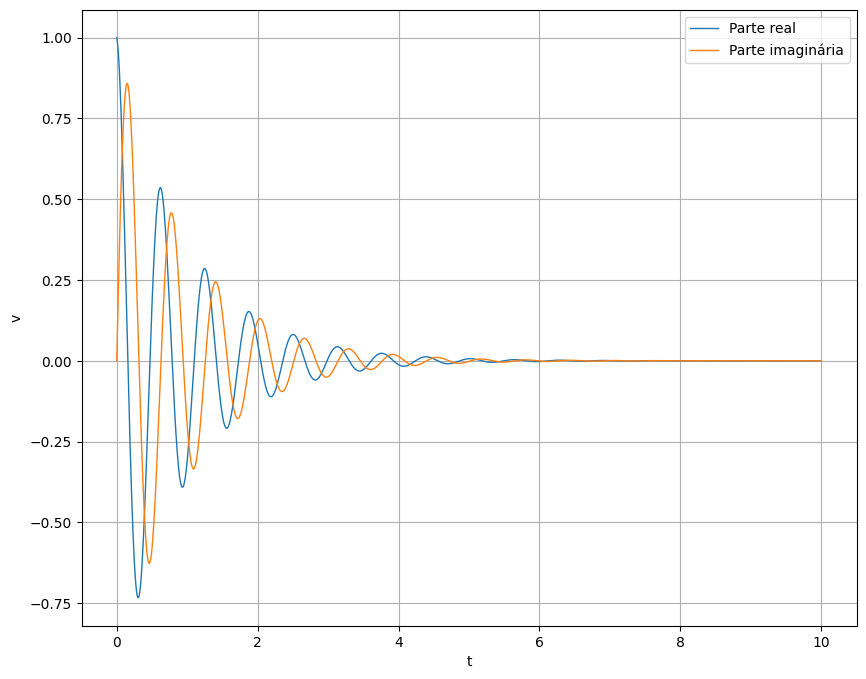

In [ ]:
# Tempos discretos
t0 = 0
T = 10
n = 1000
t = np.linspace(t0, T, n+1)

#Solução do problema modelo
v0 = 1.0
alpha = -1.0    # Aqui colocamos valores para alpha
beta = 10.0     # Aqui colocamos valores para beta
lam = alpha+beta*1j
v = v0*np.exp(lam*t)

#Gráficos
figure, axs = plt.subplots(figsize=(10,8))
plt.plot(t, v.real, label="Parte real", linewidth=1)
plt.plot(t, v.imag, label="Parte imaginária", linewidth=1)

plt.xlabel("t")
plt.ylabel("v")
plt.grid()
plt.legend()


🧩 Experimente variar os valores de $\alpha$ e $\beta$ no gráfico acima!



---





> 👉 A dinâmica da atmosfera, e dos oceanos, tem caracteristicas principalmente oscilatórias, com ondas de Gravidades, Rossby, Kelvin, Som, etc. Portanto, geralmente consideramos como problema modelo para a atmosfera/oceano o caso onde $\lambda$ tem apenas componentes imaginárias puras, isto é, $\alpha=0$, e $\beta$ indica a frequência de oscilação da onda que queremos investigar. Isso vai ser bem importante mais adiante na aula!!!





---



## O problema de Valor Inicial geral



Nosso problema geral em questão é o de achar uma função $u \in \mathcal{C}^1([t_0, T])$, que resolva a equação

$$
u'(t) = f(t,u(t)),
$$

para uma dada função $f(t,u)$, suficientemente suave, considerando conhecido o valor inicial de $u$,

$$
u(t_0)=u_0.
$$

Este problema é conhecido como problema de valor inicial, ou problema de Cauchy.

Observações:
*   A função $u$ pode ser uma função com imagem em $\mathbb{R}$ ou em $\mathbb{R}^n$, isto é, $u$ pode ser uma função vetorial.
*   Se $u$ é vetorial ($u:[t_0, T] → \mathbb{R}^n$), então $f$ também deve ser, ($f:[t_0, T]\times \mathbb{R}^n → \mathbb{R}^n$), assim como $u_0\in \mathbb{R}^n$.
*   Nesses casos vetoriais, temos um sistema de equações diferenciais.



---



### 📚 Discretização

Vamos discretizar o tempo dividindo o intervalo de tempo em $n$ subintervalos uniformemente espaçados, obtendo
 $$t_k=\frac{k}{n}(T-t_0)+t_0, \quad k=0, 1, ..., n.$$

 Chamaremos o passo de tempo de $h$,
 $$
h= \frac{T-t_0}{n}.
 $$

Definimos $u_k$ como sendo uma aproximação da função desejada no tempo $t_k$, isto é,

$$
u_k \approx u(t_k)
$$

Nosso objetivo é obter boas aproximações para $u(t_k)$.

Da série de Taylor, sabemos que

$$
u(t_{k+1})=u(t_k)+h\, u'(t_k)+O(h^2).
$$

Usando a definição do problema de Cauchy, temos que

$$
u(t_{k+1})=u(t_k)+hf(t_k, u(t_k))+O(h^2).
$$

Isso é a base para a construção do método de Euler para resolução do problema de valor inicial. O método de Euler é então dado por
$$
u_{k+1}=u_k+hf(t_k, u_k),
$$
que está bem definido se $u_0$ for dado.




---



### 💻 Exemplo 💻

Considere o problema de valor inicial dado por

$$
\begin{cases}
u'(t)=\lambda u(t), \quad  t \in [0,1]\\
u(0) = 1
\end{cases}
$$

Este problema tem solução analítica dada por $u(t)=e^{\lambda t}$.

In [ ]:
#Definição do problema
t0 = 0
T = 1
u0 = 1.0
lam = 1

def f(t, u):
  return lam*u

#Solução teórica
def u(t):
  return np.exp(lam*t)


Campo vetorial e soluções "tangentes":

In [ ]:
n = 20

#Grade de plotagem
t_tmp = np.linspace(t0, T, n+1)
u_tmp = np.arange(0, 3, 0.15)
t_grid, u_grid = np.meshgrid(t_tmp, u_tmp)

# du/dt=f(t,u)
# Gradient (dt/dt, du/dt) = (1, f(t,u))
DT = np.ones_like(t_grid) # 1
DU = u_grid  # lambda u

#Flow
u0=1
u_t = np.exp(t_tmp)

fig, ax = plt.subplots()
q = ax.quiver(t_grid, u_grid, DT, DU, angles='xy', label="f(t,u)")
ax.plot(t_tmp, u_t, label="u(t)=exp(t)")
ax.plot(0.0, u0, 'ro', label="Cond Inicial")
ax.set_xlabel("Tempo")
ax.set_ylabel("u")
plt.legend()
plt.show()

Implementação de um primeiro método numérico: Euler

In [ ]:
# O método de Euler
def euler(u0, t0, T, f, n):
  h = (T-t0)/n
  u = np.empty(n+1, dtype=np.complex_) #Vamos permitir que seja complexo!
  u[0]=u0
  for k in range(0,n):
    tk = t0+k*h
    u[k+1]=u[k]+h * f(tk, u[k])
  return u

In [ ]:
n = 10

t = np.linspace(t0, T, n+1)
u_aprox = euler(u0, t0, T, f, n)
u_exata = u(t)

erro_final = np.abs(u_aprox[-1]-u_exata[-1])

tab = PrettyTable(['n', 'u Euler', 'u Exata',  'Erro Max'])
tab.add_row([n, u_aprox[-1].real, u_exata[-1],  erro_final ])
print(tab)

In [ ]:
figure, axs = plt.subplots(figsize=(10,8))
plt.plot(t, u_aprox.real, '.', label="Euler", linewidth=1)
plt.plot(t, u_exata, label="Exata",linewidth=1)
plt.xlabel("t")
plt.ylabel("u")
plt.grid()
plt.legend()
plt.show()



---



Questão importante:

>  O que acontece com o erro quando aumentamos o número de pontos no tempo? (diminuímos $h$).


In [ ]:
tab = PrettyTable(['n', 'u Euler', 'u Exata',  'Erro Max'])
n_list = [1, 2, 4, 8,  16]

figure, axs = plt.subplots(figsize=(10,8))
plt.plot(t, u_exata, label="Exata",linewidth=1)
plt.xlabel("t")
plt.ylabel("u")

for n in n_list:
  t = np.linspace(t0, T, n+1)
  u_aprox = euler(u0, t0, T, f, n)
  u_exata = u(t)

  erro_final = np.abs(u_aprox[-1]-u_exata[-1])
  tab.add_row([n, u_aprox[-1].real, u_exata[-1],  erro_final ])

  plt.plot(t, u_aprox.real, '-o', label="Euler-"+str(n), linewidth=1, markersize=2)

plt.grid()
plt.legend()
plt.show()

print(tab)

In [ ]:
tab = PrettyTable(['n', 'u Euler', 'u Exata',  'Erro Max', "Razão"])

erro_final = []
for n in range(10):
  n = 2**n
  t = np.linspace(t0, T, n+1)
  u_aprox = euler(u0, t0, T, f, n)
  u_exata = u(t)

  erro_final.append(np.abs(u_aprox[-1]-u_exata[-1]))
  if n > 1 :
    tab.add_row([n, u_aprox[-1].real, u_exata[-1],  erro_final[-1],  erro_final[-2]/erro_final[-1]])


print(tab)

Note que o erro cai pela metade (aproximadamente) quando dobramos o número de pontos (reduzimos o $h$ pela metade). Logo, dizemos que o método é de primeira ordem $O(h^1)$.



---



### 💻 Exemplo 💻
Vejamos um exemplo um pouco mais difícil.

$$
u'=-u^2
$$
com condição inicial $u(0)=1$. A solução exata desse problema é
$$u(t) = \frac{1}{1+t}.$$

In [ ]:
#Definição do problema
t0 = 0
T = 1
u0 = 1.0
lam = 1

def f(t, u):
  return -u*u

#Solução teórica
def u(t):
  return 1/(1+t)

#Gráfico
n = 20
t = np.linspace(t0, T, n+1)
u_aprox = euler(u0, t0, T, f, n) #Usamos aqui a nossa implementação do método de Euler!
u_exata = u(t)
figure, axs = plt.subplots(figsize=(10,8))
plt.plot(t, u_aprox.real, '.', label="Euler", linewidth=1)
plt.plot(t, u_exata, label="Exata",linewidth=1)
plt.xlabel("t")
plt.ylabel("u")
plt.grid()
plt.legend()
plt.show()

#Tabela
tab = PrettyTable(['n', 'u Método', 'u Exata',  'Erro Max', "Razão"])

erro_final = []
for n in range(10):
  n = 2**n
  t = np.linspace(t0, T, n+1)
  u_aprox = euler(u0, t0, T, f, n)
  u_exata = u(t)

  erro_final.append(np.abs(u_aprox[-1]-u_exata[-1]))
  if n > 1 :
    tab.add_row([n, u_aprox[-1].real, u_exata[-1],  erro_final[-1],  erro_final[-2]/erro_final[-1]])


print(tab)



---



##Estabilidade

### 💻 Exemplo 💻

Considere o problema de valor inicial

$$
\begin{cases}
u'(t)=\lambda u(t), \quad  t \in [0,1]\\
u(0) = 1
\end{cases}
$$

Este problema tem solução analítica dada por $u(t)=e^{\lambda t}$.

Vamos analisar esse problema agora com $\lambda < 0 $ (real). Neste caso, a solução deveria ser decrescente com o avanço do tempo. Será que a solução numérica sempre decresce no tempo? Podemos usar qualquer passo de tempo ($h$)?



In [ ]:
#Definição do problema
t0 = 0
T = 1
u0 = 1.0
lam = -60

def f(t, u):
  return lam*u

#Solução teórica
def u(t):
  return np.exp(lam*t)

n = 100

t = np.linspace(t0, T, n+1)
u_aprox = euler(u0, t0, T, f, n)
u_exata = u(t)

erro_final = np.abs(u_aprox[-1]-u_exata[-1])

figure, axs = plt.subplots(figsize=(10,8))
plt.plot(t, u_aprox.real, '.', label="Euler", linewidth=1)
plt.plot(t, u_exata, label="Exata",linewidth=1)
plt.xlabel("t")
plt.ylabel("u")
plt.grid()
plt.legend()
plt.show()

In [ ]:
tab = PrettyTable(['n', 'u Euler', 'u Exata',  'Erro Max', "Estab?"])

erro_final = []
for n in range(5, 100, 5):
  t = np.linspace(t0, T, n+1)
  u_aprox = euler(u0, t0, T, f, n)
  u_exata = u(t)

  erro_final.append(np.abs(u_aprox[-1]-u_exata[-1]))
  if n > 1 :
    tab.add_row([n, u_aprox[-1].real, u_exata[-1],  erro_final[-1],  erro_final[-1]<1])

print(tab)



---



### 📚 Teoria de Estabilidade

>  Por que dependendo do $h$ o método simplesmente explode?

O problema

$$
\begin{cases}
u'(t)=\lambda u(t), \quad  t > 0 \\
u(0) = u_0
\end{cases}
$$

com $Re(\lambda)< 0$ (parte real negativa) é conhecido como problema modelo. É um problema simples para o qual a solução deve sempre decair a zero quando o tempo evolui. Ele é usado como teste de estabilidade de métodos numéricos:

> 👉 Dizemos que um método numérico é **absolutamente estável**  (A-estável) quando o comportamento numérico dele no problema modelo se assemelha qualitativamente do esperado teórico. Isto é, o método é instável quando a solução do método numérico não fica limitada, ou **cresce**, no tempo quando temos $Re(\lambda)$ negativo.


### 📚 Estabilidade de Euler

Vejamos o caso do método de Euler.

$$
u_{k+1}=u_k+hf(t_k, u_k),
$$
mas para o problema modelo $f(t,u)=\lambda u$, então
$$
u_{k+1}=u_k+h\lambda u_k = (1+h\lambda) u_k.
$$

Portanto, a cada passo de tempo discreto o método evolui a solução multiplicando a anterior por $(1+h\lambda)$. Esse termo é conhecido como **Fator de Amplificação**.

A solução depois de alguns passos de tempo será
$$
u_{k}= (1+h\lambda)^k u_0,
$$
ou seja, teremos potências do fator de amplificação.

Para que o método seja A-estável, o fator de amplificação precisa estar limitado por 1 (em módulo) para que solução seja decrescente no tempo!

$$
|1+h\lambda| < 1 \\
$$

Se $\lambda$ for real, então temos que
$$
-1 < 1+h\lambda < 1 \\
⇔ \\
-2 < h\lambda < 0 .
$$
Portanto, o método é estável se $h\lambda \in (-2,0)$.

Por exemplo: Se $\lambda = -80 $, o fator de amplificação fica
$$
-1< 1-80h < 1,
$$

$$
0 < 80h < 2,
$$

$$
0 < h < 2/80=1/40,
$$
mas, note que se $ 1/80 < h < 1/40$, então temos que o fator de amplificação ($1+\lambda h$) é negativo, portanto o método
$$
u_{k}= (1+h\lambda)^k u_0,
$$
vai trocar de sinal a cada passo! (Vai oscilar).

> 👉 Resumindo ($\lambda$ real):
*  O método de Euler é estável se $h\lambda \in (-2,0)$, isto é, não explode.
*  Se $h\lambda \in (-2,-1)$, então o método oscila.
*  Se $h\lambda \in (-1, 0)$, então a solução descresce monotonicamente, como predito na teoria.


In [ ]:
#Exemplo
#Definição do problema
t0 = 0
T = 1
u0 = 1.0
lam = -10

def f(t, u):
  return lam*u

#Solução teórica
def u(t):
  return np.exp(lam*t)


n_list = np.array([2, 4, 8,  16])
h_list = 1/n_list
print("h :", h_list)
print('\u03BB'+' h :',  lam*h_list)

n = 128
t = np.linspace(t0, T, n+1)
u_exata = u(t)

figure, axs = plt.subplots(figsize=(10,8))
plt.plot(t, u_exata, label="Exata",linewidth=1)
plt.xlabel("t")
plt.ylabel("u")

for n in n_list:
  t = np.linspace(t0, T, n+1)
  u_aprox = euler(u0, t0, T, f, n)
  u_exata = u(t)
  erro_final = np.abs(u_aprox[-1]-u_exata[-1])

  plt.plot(t, u_aprox.real, '-o', label="Euler-$\lambda$*h="+str(lam*1/n), linewidth=1, markersize=2)

plt.ylim([-3, 5])
plt.grid()
plt.legend()
plt.show()





---






Nos problemas de nosso interesse, $λ$ pode ser complexo, então precisamos investigar o que significa termos um fator de amplificação
$$
|1+h\lambda| < 1 \\
$$

Vamos denotar por $z=hλ$, um número complexo. Dá para verificar analiticamente que a região que satisfaz $|1+z| < 1 $ é um círculo de raio 1 no plano complexo centrado no ponto $(-1,0)$. Como vamos analisar vários métodos, vamos olhar isso numericalmente a seguir.

> 👉 A região no plano complexo para a qual o fator de amplificação é limitado por 1 é chamada de região de estabilidade absoluta do método. Fora dessa região, o método pode "explodir"!

In [ ]:
#Região de estabilidade

# Fator de amplificação do método z=x+y*i
fator_euler = lambda z : np.abs(1+z)


In [ ]:
def regiao_estab_fator(fator, nome_metodo):

  #Pontos de testagem
  dx = np.linspace(-3, 3, 5000)
  dy = np.linspace(-3, 3, 5000)
  x,y = np.meshgrid(dx,dy)
  z = x + 1j*y

  # Curva onde fator == 1 (aprox)
  zcurv = ((np.abs(fator(z)-1)<=0.01)).astype(int)
  # Região onde fator < 1
  zreg = (fator(z)< 1).astype(int)

  #Gráficos
  fig, ax = plt.subplots(1, 1, figsize=(6, 6))

  cmap_black = matplotlib.colors.ListedColormap(["k","k"])
  cmap_gray = matplotlib.colors.ListedColormap(["silver","silver"])


  plt.contourf(x,y,zreg, [0.99999, 1.00001], cmap=cmap_gray)
  plt.contourf(x,y,zcurv, [0.999, 1.001], cmap=cmap_black)
  #im = plt.imshow( (fator(x,y)<1).astype(int) , extent=(x.min(),x.max(),y.min(),y.max()), cmap="Greys")
  ax.axhline(y=0.0, color='grey', lw='1', linestyle='--')
  ax.axvline(x=0.0, color='grey', lw='1', linestyle='--')
  #ax.plot(-1.0, 0.0, 'r.')

  plt.title("Região de estabilidade: "+nome_metodo)
  plt.xlabel("Re($\lambda h$)")
  plt.ylabel("Im($\lambda h$)")

  plt.show()
  return fig, ax

In [ ]:
regiao_estab_fator(fator_euler, "Euler")




---





> 👉 Considerando um problema puramente oscilatório, como no nosso problema da atmosfera, será que o método de Euler é um método viável de ser usado?



In [ ]:
#Definição do problema
t0 = 0
T = 50
u0 = 1.0
lam = -1j # IMAGINÁRIO!!!!

def f(t, u):
  return lam*u

#Solução teórica
def u(t):
  return np.exp(lam*t)

h = 0.1
n = int(T/h)

t = np.linspace(t0, T, n+1)
u_aprox = euler(u0, t0, T, f, n)
u_exata = u(t)
erro_final = np.abs(u_aprox[-1]-u_exata[-1])
print("Erro final:", erro_final)

figure, axs = plt.subplots(figsize=(10,8))
plt.plot(t, u_aprox[:].real, '.', color='red', label="Euler (real)", linewidth=1, markersize=2)
plt.plot(t, u_exata[:].real, color='lightcoral', label="Exata (real)",linewidth=1)
plt.plot(t, u_aprox[:].imag, '.', color='blue', label="Euler (imag)", linewidth=1, markersize=2)
plt.plot(t, u_exata[:].imag, color='skyblue', label="Exata (imag)",linewidth=1)

plt.xlabel("t")
plt.ylabel("u")
plt.grid()
plt.legend()
plt.show()



---



## Métodos Runge-Kutta

Como vimos anteriormente, o método de Euler é um método de 1a ordem $O(h)$, isto é, quando reduzimos $h$ pela metade, o erro cai aproximadamente pela metade.

Podemos obter um método de segunda ordem, isto é, com erro da ordem de $h^2$, indicado por $O(h^2)$, usando o método explicito do trapézio, também conhecido como Euler Aprimorado ou Runge-Kutta de segunda ordem:

$$
u_{k+1}=u_k+\frac{h}{2}\left( f(t_k, u_k)+f(t_k+h, u_k+hf(t_k, u_k))\right),
$$
que pode ser implementado em 2 estágios:
$$
\kappa_1 = f(t_k, u_k) \\
\kappa_2 = f(t_k+h, u_k+h\kappa_1)\\
u_{k+1} = u_k+\frac{h}{2}\left(\kappa_1+\kappa_2 \right),
$$

### RK22




Vejamos uma implementação para o seguinte problema:

$$
\begin{cases}
u'(t)= u(t), \quad  t \in [0,1]\\
u(0) = 1
\end{cases}
$$


In [ ]:
#Definição do problema
t0 = 0
T = 1
u0 = 1.0
lam = 1

def f(t, u):
  return lam*u

#Solução teórica
def u(t):
  return np.exp(lam*t)

In [ ]:
## O método de Euler Aprimorado (RK22)
def rk22(u0, t0, T, f, n):
  h = (T-t0)/n
  u = np.empty(n+1, dtype=np.complex_)
  u[0]=u0
  for k in range(0,n):
    tk = t0+k*h
    kappa1 = f(tk, u[k])
    kappa2 = f(tk+h, u[k]+h*kappa1)
    u[k+1]=u[k]+h * (kappa1+kappa2)/2
  return u

In [ ]:
tab = PrettyTable(['n', 'u Euler', 'u RK22', 'u Exata',  'Erro Max Euler', 'Erro Max RK22'])

n = 20
t = np.linspace(t0, T, n+1)
u_aprox_euler = euler(u0, t0, T, f, n)
u_aprox_rk22 = rk22(u0, t0, T, f, n)
u_exata = u(t)

erro_final_euler = np.abs(u_aprox_euler[-1]-u_exata[-1])
erro_final_aprim = np.abs(u_aprox_rk22[-1]-u_exata[-1])
tab.add_row([n, u_aprox_euler[-1].real, u_aprox_rk22[-1].real, u_exata[-1],  erro_final_euler, erro_final_aprim ])

figure, axs = plt.subplots(figsize=(10,8))
plt.plot(t, u_exata, label="Exata",linewidth=2)
plt.xlabel("t")
plt.ylabel("u")

plt.plot(t, u_aprox_euler.real, '-o', label="Euler", linewidth=1, markersize=2)
plt.plot(t, u_aprox_rk22.real, '-o', label="RK22", linewidth=1, markersize=2)

plt.grid()
plt.legend()
plt.show()

print(tab)



---



> 👉 Um método numérico para integração no tempo é chamado de Runge-Kutta (RK) quando ele depende apenas de um passo anterior (pode ser explícito ou implícito) e o avanço no tempo é uma combinação linear de avaliações sucessivas da função de tendência ($f$, campo), chamados os "estágios" do método RK.



---



Para o método Euler Aprimorado, também conhecido como Runge-Kutta 2,2 (por ter ordem 2 e 2 estágios) é possível mostrar que a região de estabilidade é dada por:
$$
|1 + λh + (λ h)^2/2| < 1
$$

🧩 Verifique!

In [ ]:
#Região de estabilidade

# Fator de amplificação do método RK22 z=x+y*i
fator_rk22 = lambda z : np.abs(1+z+(z)**2/2)

regiao_estab_fator(fator_rk22, "RK22")

Note que a região é maior que a do método de Euler, mas ainda não pega o eixo imaginário! Portanto, não é um método adequado para problemas oscilatórios (ondas). Vejamos...

In [ ]:
#Definição do problema
t0 = 0
T = 50
u0 = 1.0
lam = -1j # IMAGINÁRIO!!!!

def f(t, u):
  return lam*u

#Solução teórica
def u(t):
  return np.exp(lam*t)

h = 0.1
h = 0.5
n = int(T/h)

t = np.linspace(t0, T, n+1)
u_aprox = rk22(u0, t0, T, f, n)
u_exata = u(t)
erro_final = np.abs(u_aprox[-1]-u_exata[-1])
print("Erro final:", erro_final)

figure, axs = plt.subplots(figsize=(10,8))
plt.plot(t, u_aprox[:].real, '-.', color='red', label="RK22 (real)", linewidth=1, markersize=2)
plt.plot(t, u_exata[:].real, color='blue', label="Exata (real)",linewidth=1)
#plt.plot(t, u_aprox[:].imag, '.', color='blue', label="RK22 (imag)", linewidth=1, markersize=2)
#plt.plot(t, u_exata[:].imag, color='skyblue', label="Exata (imag)",linewidth=1)

plt.xlabel("t")
plt.ylabel("u")
plt.grid()
plt.legend()
plt.show()

👉 Note que neste caso conseguimos usar um $h$ maior que no Euler (a instabilidade demora mais para crescer com o mesmo $h$)



---



### RK33

Podemos construir um método de 3a ordem com 3 estágios da seguinte forma:

$$
\kappa_1 = f(t_k, u_k) \\
\kappa_2 = f(t_k+\frac{h}{2}, u_k+\frac{h}{2}\kappa_1)\\
\kappa_3 = f(t_k+h, u_k+2h\kappa_2-h\kappa_1)\\
u_{k+1} = u_k+\frac{h}{6}\left(\kappa_1+4\kappa_2+\kappa_3 \right),
$$

👉 Existem infinitos métodos RK33, e este é conhecido como Método Clássico de Kutta de ordem 3.

In [ ]:
## O método de Runge-Kutta 3 3
def rk33(u0, t0, T, f, n):
  h = (T-t0)/n
  u = np.empty(n+1, dtype=np.complex_)
  u[0] = u0
  for k in range(0,n):
    tk = t0+k*h
    kappa1 = f(tk, u[k])
    kappa2 = f(tk+h/2, u[k]+h*kappa1/2)
    kappa3 = f(tk+h, u[k]+2*h*kappa2-h*kappa1)
    u[k+1]=u[k]+h * (kappa1+4*kappa2+kappa3)/6.0
    #print(k, u[k,:])
    if np.max(np.max(u[k])) > 10e5:
      print("Método instável...desisto!")
      return u
  return u

In [ ]:
#Definição do problema
t0 = 0
T = 50
u0 = 1.0
lam = -1j # IMAGINÁRIO!!!!

def f(t, u):
  return lam*u

#Solução teórica
def u(t):
  return np.exp(lam*t)


h = 0.1
n = int(T/h)

In [ ]:
tab = PrettyTable(['n',  'Erro Max Euler', 'Erro Max RK22', 'Erro Max RK33'])

t = np.linspace(t0, T, n+1)
u_aprox_euler = euler(u0, t0, T, f, n)
u_aprox_rk22 = rk22(u0, t0, T, f, n)
u_aprox_rk33 = rk33(u0, t0, T, f, n)
u_exata = u(t)

erro_final_euler = np.abs(u_aprox_euler[-1]-u_exata[-1])
erro_final_rk22 = np.abs(u_aprox_rk22[-1]-u_exata[-1])
erro_final_rk33 = np.abs(u_aprox_rk33[-1]-u_exata[-1])
tab.add_row([n, erro_final_euler, erro_final_rk22, erro_final_rk33 ])

figure, axs = plt.subplots(figsize=(10,8))
#plt.plot(t, u_exata, label="Exata",linewidth=2)
plt.xlabel("t")
plt.ylabel("Erro Re(u)")

plt.plot(t, u_aprox_euler.real-u_exata.real, '-o', label="Euler", linewidth=1, markersize=2)
plt.plot(t, u_aprox_rk22.real-u_exata.real, '-o', label="RK22", linewidth=1, markersize=2)
plt.plot(t, u_aprox_rk33.real-u_exata.real, '-o', label="RK33", linewidth=1, markersize=2)
plt.ylim(-1,1)
plt.grid()
plt.legend()
plt.show()

print(tab)



---



Vamos verificar se o método é mesmo de 3a ordem de convergência, usando o problema não linear:
$$
u'=-u^2
$$
com condição inicial $u(0)=1$. A solução exata desse problema é
$$u(t) = \frac{1}{1+t}.$$

In [ ]:
#Definição do problema
t0 = 0
T = 1
u0 = 1.0
lam = 1

def f(t, u):
  return -u*u

#Solução teórica
def u(t):
  return 1/(1+t)

#Gráfico
n = 20
t = np.linspace(t0, T, n+1)
u_aprox = rk33(u0, t0, T, f, n)
u_exata = u(t)
figure, axs = plt.subplots(figsize=(10,8))
plt.plot(t, u_aprox.real, '.', label="RK33", linewidth=1)
plt.plot(t, u_exata, label="RK33",linewidth=1)
plt.xlabel("t")
plt.ylabel("u")
plt.grid()
plt.legend()
plt.show()

#Tabela
tab = PrettyTable(['n', 'u Método', 'u Exata',  'Erro Max', "Razão"])

erro_final = []
for n in range(10):
  n = 2**n
  t = np.linspace(t0, T, n+1)
  u_aprox = rk33(u0, t0, T, f, n)
  u_exata = u(t)

  erro_final.append(np.abs(u_aprox[-1]-u_exata[-1]))
  if n > 1 :
    tab.add_row([n, u_aprox[-1].real, u_exata[-1],  erro_final[-1],  erro_final[-2]/erro_final[-1]])


print(tab)

👉 Maravilha! Parece que a razão de decimento do erro é $2^3$ quando dividimos $h$ por $2$!

Vejamos a estabilidade agora.

In [ ]:
#Região de estabilidade

# Fator de amplificação do método RK33 z=x+y*i
fator_rk33 = lambda z : np.abs((1 + z + (1./2.)*z**2 + (1./6.)*z**3))

regiao_estab_fator(fator_rk33, "RK33")

🧩 Qual o maior passo de tempo ($h$) possível para um método RK33 considerando um dado problema com frequência de oscilação $\lambda$ sem dissipação?



---



### RK44

O método Runge-Kutta 4-4 é um clássico:

$$
\kappa_1 = f(t_k, u_k) \\
\kappa_2 = f(t_k+\frac{h}{2}, u_k+\frac{h}{2}\kappa_1)\\
\kappa_3 = f(t_k+\frac{h}{2}, u_k+\frac{h}{2}\kappa_2)\\
\kappa_4 = f(t_k+h, u_k+h\kappa_3)\\
u_{k+1} = u_k+\frac{h}{6}\left(\kappa_1+2\kappa_2+2\kappa_3+\kappa_4 \right),
$$

In [ ]:
## O método de Runge-Kutta 4 4
def rk44(u0, t0, T, f, n):
  h = (T-t0)/n
  u = np.empty(n+1, dtype=np.complex_)
  u[0] = u0
  for k in range(0,n):
    tk = t0+k*h
    kappa1 = f(tk, u[k])
    kappa2 = f(tk+h/2, u[k]+h*kappa1/2)
    kappa3 = f(tk+h/2, u[k]+h*kappa2/2)
    kappa4 = f(tk+h, u[k]+h*kappa3)
    u[k+1]=u[k]+h * (kappa1+2*kappa2+2*kappa3+kappa4)/6.0
    #print(k, u[k,:])
    if np.max(np.max(u[k])) > 10e5:
      print("Método instável...desisto!")
      return u
  return u

In [ ]:
#Definição do problema
t0 = 0
T = 50
u0 = 1.0
lam = -1j # IMAGINÁRIO!!!!

def f(t, u):
  return lam*u

#Solução teórica
def u(t):
  return np.exp(lam*t)


h = 0.1
n = int(T/h)

In [ ]:
tab = PrettyTable(['n',  'Erro Max RK22', 'Erro Max RK33', 'Erro Max RK44'])


figure, axs = plt.subplots(figsize=(10,8))
#plt.plot(t, u_exata, label="Exata",linewidth=2)
plt.xlabel("t")
plt.ylabel("Erro Re(u)")

t = np.linspace(t0, T, n+1)

u_aprox_aprim = rk22(u0, t0, T, f, n)
u_aprox_rk33 = rk33(u0, t0, T, f, n)
u_aprox_rk44 = rk44(u0, t0, T, f, n)
u_exata = u(t)


erro_final_aprim = np.abs(u_aprox_aprim[-1]-u_exata[-1])
erro_final_rk33 = np.abs(u_aprox_rk33[-1]-u_exata[-1])
erro_final_rk44 = np.abs(u_aprox_rk44[-1]-u_exata[-1])
tab.add_row([n, erro_final_aprim, erro_final_rk33, erro_final_rk44 ])


plt.plot(t, u_aprox_aprim.real-u_exata.real, '-o', label="RK22", linewidth=1, markersize=2)
plt.plot(t, u_aprox_rk33.real-u_exata.real, '-o', label="RK33", linewidth=1, markersize=2)
plt.plot(t, u_aprox_rk44.real-u_exata.real, '-o', label="RK44", linewidth=1, markersize=2)
plt.ylim(-0.05,0.05)
plt.grid()
plt.legend()
plt.show()

print(tab)

In [ ]:
#Região de estabilidade

# Fator de amplificação do método RK44 z=x+y*i
fator_rk44 = lambda z : np.abs((1 + z + (1./2.)*z**2 + (1./6.)*z**3 + (1./24.)*z**2*z**2))

regiao_estab_fator(fator_rk44, "RK44")

🧩 Qual o maior passo de tempo ($h$) possível para um método RK44 considerando um dado problema com frequência de oscilação $\lambda$ sem dissipação?



---


> 👉 Quanto mais estágios, mais caro o método! Cada estágio é equivalente a computar toda a "tendência" do modelo (avaliar toda a parte espacial do modelo).






---



👉 Quer saber mais sobre a parte teórica de convergência e estabilidade dos métodos? Veja os livros:

- Durran, Dale R. Numerical methods for fluid dynamics: With applications to geophysics. Vol. 32. Springer Science & Business Media, 2010.

- Lambert, John Denholm. Numerical methods for ordinary differential systems. Vol. 146. New York: Wiley, 1991.



---



# ❗Exercício ❗

O Model for Prediction Across Scales (MPAS - https://mpas-dev.github.io/ ) usa como integrador temporal o esquema proposto em Wicker, L. J., & Skamarock, W. C. (2002) ([DOI](https://doi.org/10.1175/1520-0493(2002)130<2088:TSMFEM>2.0.CO;2), que é um Runge-Kutta de 3a ordem e 3 estágios para sistemas autônomos ($f(t,u)=f(u)$, isto é, $f$ só depende de $u$).

👉 No MPAS é usado um "splitting", com algumas partes do problema sendo integrados com "sub-ciclos" (passos de tempos menores). No nosso exemplo, como temos apenas uma equação escalar, o problema fica bem mais simples.

Onde isso aparece no código do MPAS?

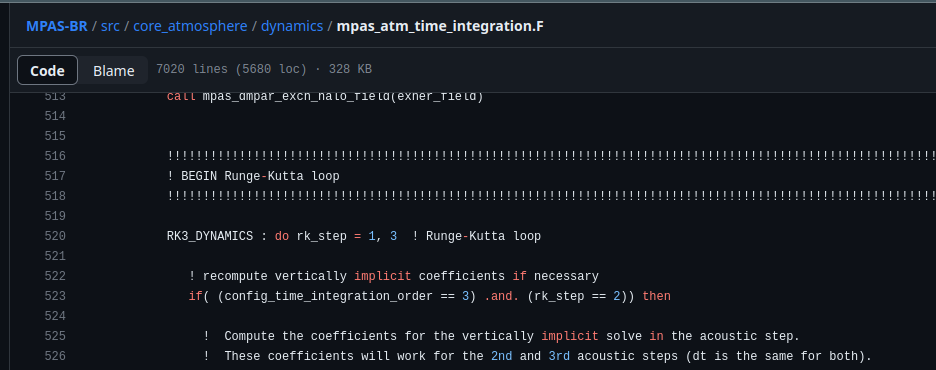

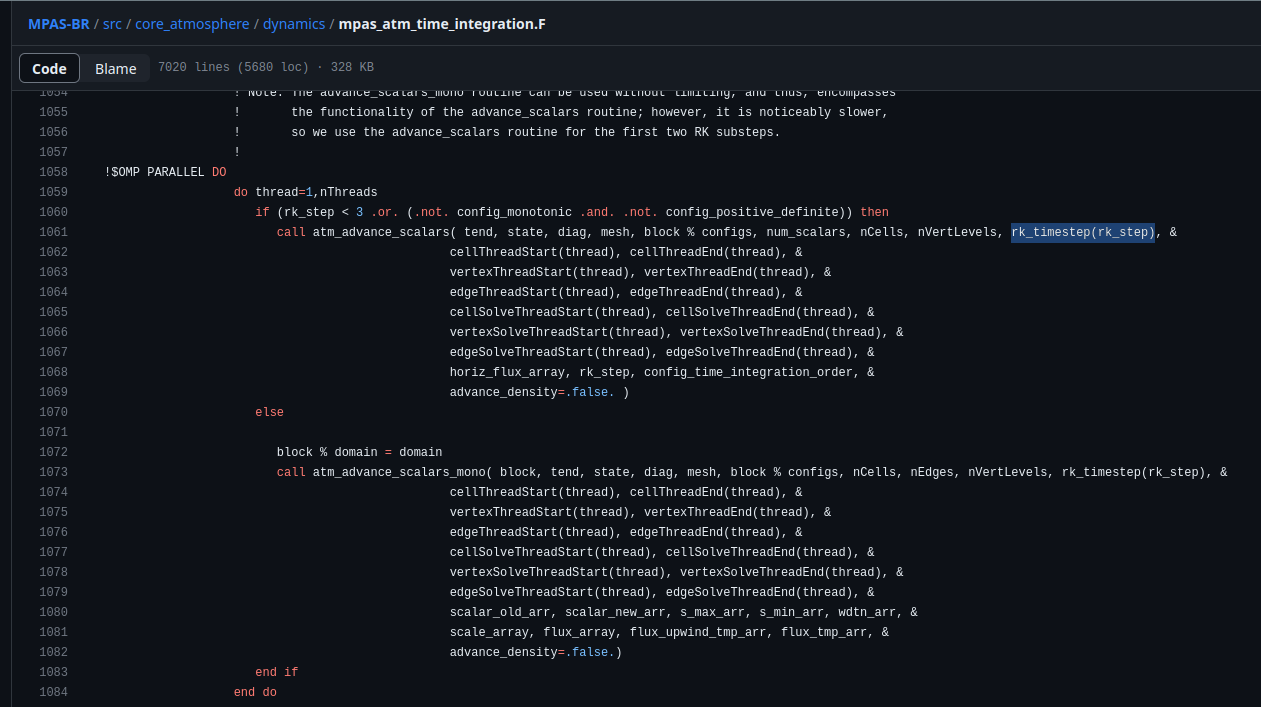

Referências:

- Skamarock, William C., Joseph B. Klemp, Michael G. Duda, Laura D. Fowler, Sang-Hun Park, and Todd D. Ringler. "A multiscale nonhydrostatic atmospheric model using centroidal Voronoi tesselations and C-grid staggering." Monthly Weather Review 140, no. 9 (2012): 3090-3105.

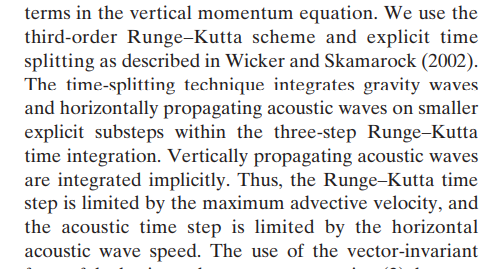

- Wicker, Louis J., and William C. Skamarock. "Time-splitting methods for elastic models using forward time schemes." Monthly weather review 130, no. 8 (2002): 2088-2097.

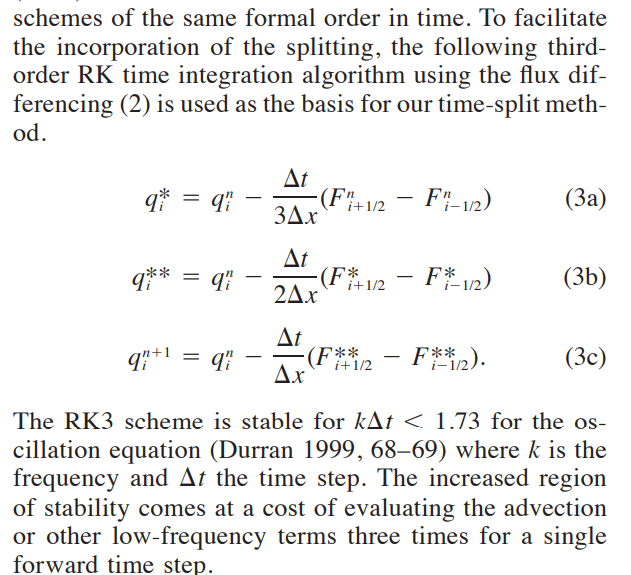

(Vamos discutir essa notação de fluxo na próxima aula)

Método RK33 do MPAS simplificado (sem splitting):

$$
u_{k+1}=u_k+h f(u^{**}),
$$
$$
u^{**} = u_k + \frac{h}{2} f(u^{*}) \\
u^{*} = u_k + \frac{h}{3} f(u_k) \\
$$

que pode ser implementado em 3 estágios:
$$
\kappa_1 = f(t_k, u_k) \\
\kappa_2 = f(t_k+\frac{h}{3}, u_k+\frac{h}{3}\kappa_1)\\
\kappa_3 = f(t_k+\frac{h}{2}, u_k+\frac{h}{2}\kappa_2)\\
u_{k+1} = u_k+h \kappa_3,
$$

👉 A principal vantagem aparente desse método em relação ao clássico RK33 é que não precisamos guardar na memória os 3 estágios, podemos calcular o próximo estágio e descartar o anterior! Isso fornece uma redução de memória substancial para modelos atmosfericos!

🧩 É possível re-arranjar as contas do RK33 usual para reduzir memória também...mas não de forma tão direta.

1. ❗ Implemente o método RK33 do MPAS e compare com os métodos RK33 clássico e RK44 no problema modelo oscilatório. Verifique que o resultado do método do MPAS é idêntico ao RK33 clássico, e que ele tem ordem de convergência 3 nesse problema linear.

2. 🧩 Verifique teoricamente que a região de estabilidade do RK33 do MPAS é a mesma que o do clássico.

3. ❗Teste o seu método, e compare com o RK33 clássico, usando o seguinte problema não linear
$$
u'=-u^2
$$
com condição inicial $u(0)=1$. A solução exata desse problema é
$$u(t) = \frac{1}{1+t}.$$
O método é de qual ordem de convergência?

4. 🧩 Conclua (verifique) que o método RK33 do MPAS tem a mesma região de estabilidade do RK33 clássico, pegando boa parte do eixo imaginários, mas tem apenas 2a ordem de convergência em $h$ para problemas não lineares, e 3a ordem para problemas lineares.




---



Respostas (códigos e textos):

In [ ]:
## O método de Runge-Kutta 3 3 do MPAS
def rk33mpas(u0, t0, T, f, n):
  h = (T-t0)/n
  u = np.empty(n+1, dtype=np.complex_)
  u[0] = u0
  #Coloque aqui o seu código

  return u



---

